<a href="https://colab.research.google.com/github/kushalnavghare/DSC-478_PRG_ML_APP/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### env setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:

%cd drive/MyDrive/DSC-478_PRG_ML_APPS/

/content/drive/MyDrive/DSC-478_PRG_ML_APPS


In [4]:
# import libs
import pandas as pd
import numpy as np

In [5]:
pd.set_option('display.max_columns', 101)

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfTransformer as tfIdfTransformation

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
RANDOM_STATE = 33

For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the Scikit-learn machine learning package for Python as well as modules based on the textbook code (Machine Learning in Action).

# 1. Regression Analysis [Dataset: communities.zip]

For this problem you will experiment with multiple linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". Note: The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following.

## a.
Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (important note: for reporducible output across multiple runs, please use "random_state = 33"). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [10]:
# read data
raw_communities = pd.read_csv('data/communities.csv')

In [11]:
raw_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [12]:
# unique level of data check
raw_communities[['state', 'communityname']].value_counts()

state  communityname   
1      Alabastercity       1
39     Lebanoncity         1
       Miamitownship       1
       Miamisburgcity      1
       Mentorcity          1
                          ..
19     Newtoncity          1
       MasonCitycity       1
       Marshalltowncity    1
       Indianolacity       1
56     Sheridancity        1
Length: 1994, dtype: int64

In [13]:
# null check
((raw_communities.isna().sum())>0).value_counts()

False    100
dtype: int64

No null values in the dataset

In [14]:
raw_communities.dtypes.reset_index().groupby(0).agg({'index':'unique'}).reset_index()

,0,index
0,int64,[state]
1,float64,"[population, householdsize, racepctblack, race..."
2,object,"[communityname, OtherPerCap]"


In [15]:
(raw_communities == "?").values.nonzero()

(array([130]), array([27]))

In [16]:
raw_communities = raw_communities.replace('?', np.nan)

In [17]:
# convert object to float
raw_communities['OtherPerCap'] = raw_communities['OtherPerCap'].astype(float)

In [18]:
raw_communities = raw_communities.fillna(raw_communities.mean())

In [19]:
(raw_communities.isna().sum()).value_counts()

0    100
dtype: int64

In [20]:
raw_communities.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.461244,0.434453,0.487568,0.494273,0.487748,0.610918,0.620657,0.664032,0.582884,0.501449,0.526690,0.036294,0.249995,0.030060,0.320211,0.360622,0.399077,0.427879,0.181364,0.182126,0.184774,0.182879,0.785903,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.190960,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.182460,0.175437,0.175170,0.183607,0.154594,0.201976,0.206353,0.218749,0.191507,0.168612,0.175241,0.108671,0.229946,0.087189,0.219088,0.210924,0.201498,0.194970,0.235792,0.236333,0.236739,0.234822,0.226869,0.219716,0.196567,0.190709,0.169551,0.157924,0.189301,

In [21]:
# dep vs indep vars
X = raw_communities.drop(["state",	"communityname", "ViolentCrimesPerPop"], axis=1)
y = raw_communities['ViolentCrimesPerPop']

In [22]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=.20)

In [23]:
X_test.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1158,0.00,0.46,0.01,0.97,0.09,0.04,0.40,0.26,0.20,0.49,0.02,1.00,1.00,0.55,1.00,0.88,0.42,0.09,0.46,1.00,1.00,1.00,1.00,0.81,0.71,0.24,1.00,0.00,0.07,0.04,0.04,0.97,0.16,0.38,0.20,0.64,0.24,0.21,0.20,0.22,0.37,0.97,0.95,0.97,0.91,0.25,0.00,0.00,0.02,0.00,0.45,0.45,0.51,0.46,0.19,0.17,0.17,0.15,0.89,0.06,0.16,0.19,0.51,0.48,0.45,0.99,0.01,0.00,1.0,0.02,0.63,0.99,0.09,0.47,0.67,0.00,0.00,0.85,1.00,1.00,0.78,1.00,1.00,1.00,0.46,0.44,0.22,0.00,0.00,0.18,0.13,0.73,0.76,0.55,0.04,0.06,0.03
1079,0.01,0.35,0.01,0.96,0.04,0.04,0.32,0.45,0.29,0.62,0.02,0.94,0.30,0.45,0.10,0.39,0.62,0.38,0.38,0.34,0.32,0.32,0.21,0.08,0.05,0.17,0.22,0.01,0.24,0.44,0.58,0.20,0.41,0.48,0.58,0.32,0.45,0.40,0.45,0.47,0.39,0.53,0.58,0.61,0.59,0.64,0.63,0.01,0.25,0.00,0.07,0.12,0.25,0.30,0.02,0.03,0.05,0.06,0.78,0.08,0.14,0.13,0.36,0.42,0.34,0.43,0.07,0.56,0.0,0.04,0.53,0.42,0.13,0.70,0.25,0.18,0.41,0.31,0.30,0.29,0.23,0.32,0.35,0.31,0.34,0.46,0.58,0.00,0.00,0.11,0.86,0.66,0.88,0.80,0.03,0.11,0.01
1633,0.51,0.31,0.60,0.46,0.06,0.09,0.42,0.54,0.39,0.48,0.52,1.00,0.11,0.28,0.15,0.34,0.57,0.92,0.53,0.15,0.18,0.22,0.20,0.13,0.23,0.15,0.19,0.74,0.68,0.43,0.57,0.24,0.80,0.27,0.36,0.63,0.60,0.74,0.59,0.62,0.45,0.12,0.21,0.19,0.13,0.31,0.29,0.62,0.85,0.10,0.33,0.32,0.34,0.34,0.11,0.09,0.09,0.08,0.80,0.12,0.27,0.20,0.31,0.41,0.29,0.31,0.10,0.49,0.5,0.83,0.58,0.29,0.87,0.66,0.00,0.54,0.30,0.06,0.06,0.08,0.14,0.16,0.18,0.20,0.81,0.24,0.57,0.17,0.01,0.13,0.80,0.61,0.87,0.84,0.12,0.68,0.75
1700,0.02,0.52,0.25,0.63,0.03,0.31,0.54,0.62,0.44,0.36,0.00,0.00,0.26,0.60,0.71,0.34,0.43,0.37,0.26,0.27,0.31,0.37,0.12,0.16,0.30,0.25,0.27,0.03,0.46,0.46,0.54,0.29,0.35,0.47,0.49,0.27,0.56,0.41,0.60,0.60,0.53,0.57,0.49,0.53,0.52,0.59,0.59,0.02,0.37,0.01,0.50,0.76,0.77,0.81,0.16,0.21,0.19,0.19,0.74,0.22,0.38,0.35,0.48,0.47,0.51,0.43,0.34,0.59,0.0,0.05,0.54,0.45,0.32,0.49,0.67,0.82,0.67,0.09,0.13,0.17,0.28,0.29,0.29,0.30,0.56,0.63,0.56,0.01,0.00,0.13,0.72,0.35,0.50,0.70,0.13,0.04,0.01
1956,0.03,0.37,0.40,0.68,0.03,0.01,0.39,0.47,0.34,0.55,0.04,1.00,0.23,0.52,0.17,0.36,0.56,0.35,0.44,0.27,0.28,0.32,0.19,0.17,0.29,0.24,0.17,0.03,0.31,0.47,0.59,0.22,0.22,0.52,0.64,0.25,0.60,0.37,0.52,0.57,0.38,0.49,0.46,0.54,0.62,0.64,0.73,0.03,0.42,0.00,0.46,0.68,0.59,0.57,0.04,0.05,0.04,0.04,0.97,0.03,0.17,0.16,0.37,0.37,0.38,0.53,0.15,0.58,0.0,0.04,0.73,0.53,0.27,0.59,0.40,0.31,0.12,0.09,0.10,0.13,0.16,0.21,0.23,0.24,0.30,0.38,0.42,0.01,0.01,0.03,0.78,0.59,0.71,0.69,0.06,0.10,0.00


## b.
Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [24]:
# initiate model
lin_model = LinearRegression()

In [25]:
# fit model on train
lin_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# predict
train_preds = lin_model.predict(X_train)
test_preds = lin_model.predict(X_test)

In [27]:
print("RMSE:Train")
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print(train_rmse)

RMSE:Train
0.1261959313342669


In [28]:
# get model attr
lin_intercept = lin_model.intercept_
lin_coefficient = lin_model.coef_[0]

In [29]:
x = np.linspace(min(train_preds), max(train_preds), 100)

In [30]:
y = lin_intercept + lin_coefficient * x

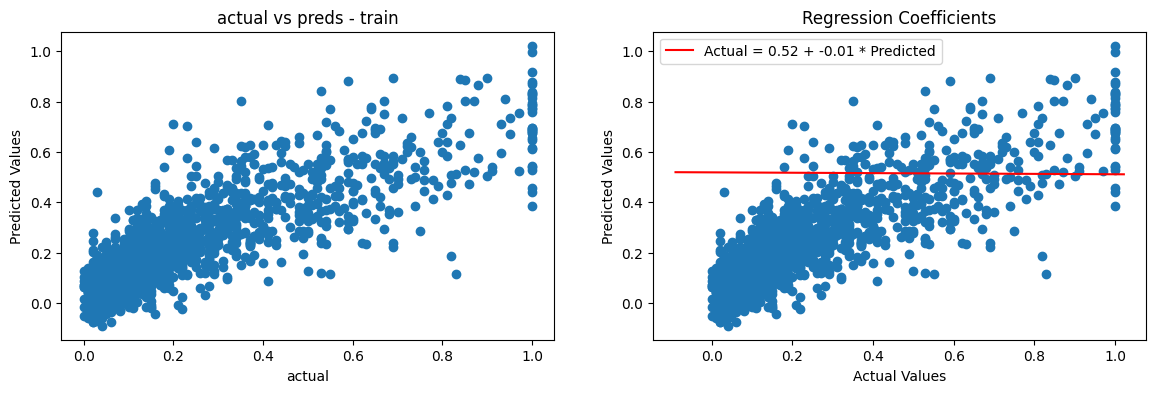

In [31]:
# correlation

plt.figure(figsize=(14, 4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(y_train, train_preds)
ax1.set_xlabel("actual")
ax1.set_ylabel('Predicted Values')
ax1.set_title('actual vs preds - train')


# ax2.subplot(102)
ax2.plot(x, y, color='red', label=f'Actual = {lin_intercept:.2f} + {lin_coefficient:.2f} * Predicted')
ax2.scatter(y_train, train_preds)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Regression Coefficients')
ax2.legend()


# ax2.grid(True)
# ax2.show()

In [32]:
# KFold cross validation
k = 10
kf_cv = KFold(n_splits=k, random_state=RANDOM_STATE, shuffle=True)

In [33]:
test_cv_rmse = []

In [34]:
for train_index , test_index in kf_cv.split(X_train):
    # split data
    X_train_cv , X_test_cv = X_train.iloc[train_index,:],X_train.iloc[test_index,:]
    y_train_cv , y_test_cv = y_train.iloc[train_index] , y_train.iloc[test_index]

    # train model
    lin_cv_model = LinearRegression()
    lin_cv_model.fit(X_train_cv, y_train_cv)

    # predict vals
    pred_values = lin_cv_model.predict(X_test_cv)

    rmse_test = np.sqrt(mean_squared_error(pred_values , y_test_cv))
    test_cv_rmse.append(rmse_test)

Text(0, 0.5, 'RMSE')

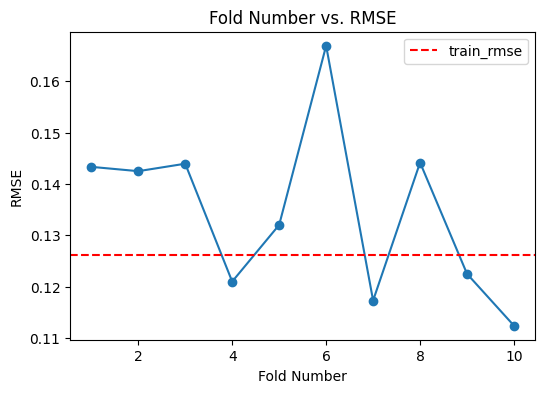

In [35]:
fold_numbers = np.arange(1, k + 1)
plt.figure(figsize=(6, 4))
plt.plot(fold_numbers, test_cv_rmse, marker='o', linestyle='-')
plt.axhline(train_rmse, linestyle="--", color = 'r', label='train_rmse')
plt.legend()
plt.title('Fold Number vs. RMSE')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')

## c.
**Feature Selection**:  use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values [Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. In this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use aboslute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partition.


In [36]:
# import libs
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [37]:
# constants
k = 5
percentiles = range(1, 100, 5)
lin_feat_selct_model = LinearRegression()
kf_feat_selct = KFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)

In [38]:
mae_results = []

In [39]:
# function
def selectBestFeatures(X_train, y_train, model):
  for i in range(1, 100, 5):
    fs = SelectPercentile(f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    mae = -np.mean(cross_val_score(model, X_train_fs, y_train, cv=kf_feat_selct, scoring='neg_mean_absolute_error'))
    # print("%2d  %0.4f" % (i, -1*scores.mean()))
    mae_results.append(mae)
    # Find the maximum value in the list
  # min_result = min(mae_results)
  # Find the index of the maximum value
  # optimal_percentile_ind = mae_results.index(min_result)
  return mae_results

In [40]:
final_mae_results = selectBestFeatures(X_train, y_train, lin_feat_selct_model)

In [41]:
opt_percntle = percentiles[np.argmin(final_mae_results)]
print(f'Optimal Percentile: {opt_percntle}')

Optimal Percentile: 41


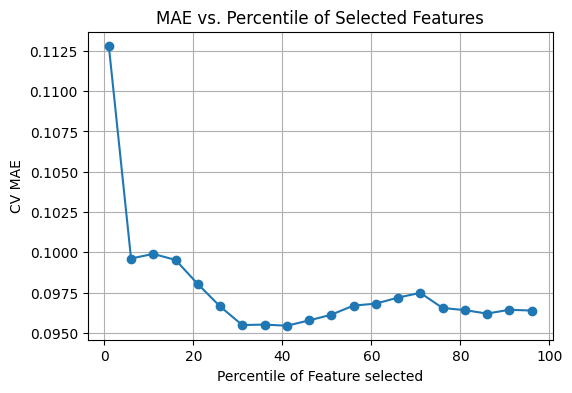

In [42]:
plt.figure(figsize=(6, 4))
plt.plot(percentiles, final_mae_results, marker='o')
plt.title('MAE vs. Percentile of Selected Features')
plt.xlabel('Percentile of Feature selected')
plt.ylabel('CV MAE')
plt.grid(True)

In [43]:
# Train the model using optimal subset of features
selector = SelectPercentile(score_func=f_regression, percentile=opt_percntle)

In [44]:
# select best from train test
X_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [45]:
# fit reg model
lin_feat_selct_model.fit(X_selected, y_train)

LinearRegression()

In [46]:
# Make predictions on the test data
test_preds = lin_feat_selct_model.predict(X_test_selected)

In [47]:
# test MAE
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE on Test Data: {test_mae:.2f}')

MAE on Test Data: 0.10


## d.
Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. [Hint: for an example of a similar model optimization process please review the class example notebook.]

In [48]:
# import libs and methods
from sklearn.linear_model import Ridge, Lasso

In [49]:
# constants
k = 5

In [206]:
#
alpha_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [212]:
# lists for train test rmse
ridge_train_rmse = []
lasso_train_rmse = []

ridge_test_rmse = []
lasso_test_rmse = []

ridge_final_train_rmse = []
ridge_final_test_rmse = []

lasso_final_train_rmse = []
lasso_final_test_rmse = []

for alpha in alpha_vals:
  # define model
  ridge_model = Ridge(alpha = alpha, random_state=RANDOM_STATE)
  lasso_model = Lasso(alpha = alpha, random_state=RANDOM_STATE)

  cv = KFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)
  for train_index, test_index in cv.split(X_train):
    train_fold, test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    ridge_model.fit(train_fold, y_train_fold)
    lasso_model.fit(train_fold, y_train_fold)

    ridge_train_preds = ridge_model.predict(train_fold)
    lasso_train_preds = lasso_model.predict(train_fold)

    ridge_test_preds = ridge_model.predict(test_fold)
    lasso_test_preds = lasso_model.predict(test_fold)

    ridge_train_rmse.append(np.sqrt(mean_squared_error(y_train_fold, ridge_train_preds)))
    ridge_test_rmse.append(np.sqrt(mean_squared_error(y_test_fold, ridge_test_preds)))

    lasso_train_rmse.append(np.sqrt(mean_squared_error(y_train_fold, lasso_train_preds)))
    lasso_test_rmse.append(np.sqrt(mean_squared_error(y_test_fold, lasso_test_preds)))

  ridge_final_train_rmse.append(np.mean(ridge_train_rmse))
  ridge_final_test_rmse.append(np.mean(ridge_test_rmse))

  lasso_final_train_rmse.append(np.mean(lasso_train_rmse))
  lasso_final_test_rmse.append(np.mean(lasso_test_rmse))

Text(0.5, 1.0, 'Ridge model RMSE')

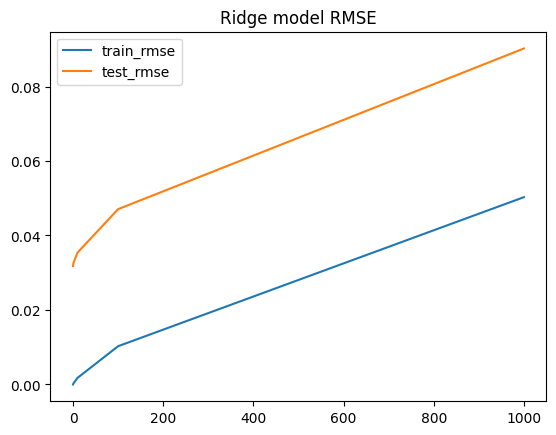

In [215]:
plt.plot(alpha_vals, ridge_final_train_rmse, label = 'train_rmse')
plt.plot(alpha_vals, ridge_final_test_rmse, label = 'test_rmse')
plt.legend()
plt.title("Ridge model RMSE")

Text(0.5, 1.0, 'Lasso model RMSE')

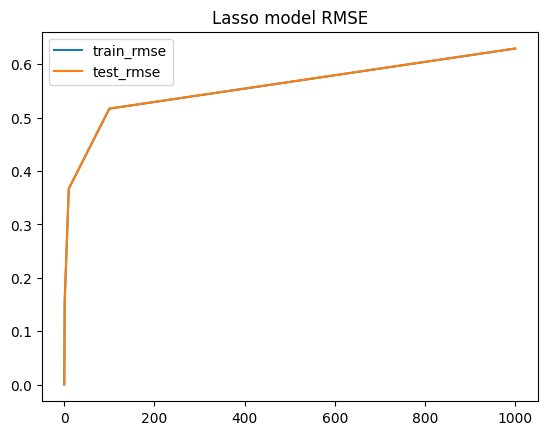

In [216]:
plt.plot(alpha_vals, lasso_final_train_rmse, label = 'train_rmse')
plt.plot(alpha_vals, lasso_final_test_rmse, label = 'test_rmse')
plt.legend()
plt.title("Lasso model RMSE")

## e.
Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments.


In [57]:
# import libs n methods
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [58]:
# define params
param_grid = {
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [59]:
# transform features
scaler = StandardScaler()

In [60]:
# scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [61]:
# estimator
sgd_estimator = SGDRegressor(random_state=RANDOM_STATE)

In [62]:
# grid search
grid_search = GridSearchCV(sgd_estimator, param_grid, scoring='neg_mean_squared_error', cv=k)

In [63]:
# fit search
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=33),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

In [64]:
# best estimator
grid_search.best_params_

{'alpha': 0.001, 'penalty': 'l1'}

In [65]:
best_params = grid_search.best_params_

In [66]:
# train using best params
sgd_regressor_best = SGDRegressor(**best_params, random_state=RANDOM_STATE)
sgd_regressor_best.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.001, penalty='l1', random_state=33)

In [67]:
# predict
train_preds = sgd_regressor_best.predict(X_train_scaled)
test_preds = sgd_regressor_best.predict(X_test_scaled)

In [68]:
# performance
print("Train RMSE =", np.sqrt(mean_squared_error(y_train, train_preds)))
print("Test RMSE =", np.sqrt(mean_squared_error(y_test, test_preds)))

Train RMSE = 0.13199069423798254
Test RMSE = 0.1466398107523007


In [69]:
# define l1_ratio range
l1_ratios = np.linspace(0, 1, num=11)

In [70]:
best_params['penalty'] = "elasticnet"

In [71]:
best_params

{'alpha': 0.001, 'penalty': 'elasticnet'}

In [72]:
best_l1_ratio = None
best_rmse = float('inf')

In [73]:
for l1_ratio in l1_ratios:
  elastic_net = SGDRegressor(**best_params, l1_ratio=l1_ratio, random_state=RANDOM_STATE)
  elastic_net.fit(X_train_scaled, y_train)
  test_preds = elastic_net.predict(X_test_scaled)
  test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

  if test_rmse < best_rmse:
    best_l1_ratio = l1_ratio
    best_rmse = test_rmse

In [74]:
print("Best L1 ratio =", best_l1_ratio)

Best L1 ratio = 0.7000000000000001


In [75]:
# train on best params
sgd_elastic_best = SGDRegressor(**best_params, l1_ratio=best_l1_ratio, random_state=RANDOM_STATE)

In [76]:
# fit
sgd_elastic_best.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.001, l1_ratio=0.7000000000000001, penalty='elasticnet',
             random_state=33)

In [77]:
# predict
train_preds = sgd_elastic_best.predict(X_train_scaled)
test_preds = sgd_elastic_best.predict(X_test_scaled)

In [78]:
# performance
print("Train RMSE =", np.sqrt(mean_squared_error(y_train, train_preds)))
print("Test RMSE =", np.sqrt(mean_squared_error(y_test, test_preds)))

Train RMSE = 0.1318249631735324
Test RMSE = 0.1465612631216212


SGDRegressor with 'l1' penalty and alpha=0.001
*   train RMSE = 0.13199
*   test RMSE = 0.14664

SGDRegressor with 'elasticnet' penalty, alpha=0.001, and l1_ratio=0.1


*   train RMSE = 0.13159
*   test RMSE = 0.14765


The models demonstrate good generalisation to new data, as evidenced by the test RMSE values in both cases being quite close to the training RMSE. Nevertheless, the models may be further optimised by adjusting hyperparameters and experimenting with alternative alpha values and l1_ratios.

# 2. Automatic Document Clustering [Dataset: newsgroups5.zip]

For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following:

## a.
Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimentional vectors and returns the inverse as the distance between these vectors.

In [79]:
def cosine_similarity_distance(vector1, vector2):
    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)

    # Calculate the L2 (Euclidean) norms of both vectors
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    # Calculate the Cosine similarity
    cosine_similarity = dot_product / (norm_vector1 * norm_vector2)

    # Convert the similarity to distance (inverse of similarity)
    distance = 1 - cosine_similarity

    return distance

## b.
Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

In [80]:
# constants
RANDOM_STATE = 99
TEST_SIZE = .20

In [81]:
# read data
raw_matrix = pd.read_table("data/matrix.txt", sep=",", header=None)
raw_terms = pd.read_table("data/terms.txt", sep=",", header=None)
raw_classes = pd.read_table("data/classes.txt", sep=" ", header=None, index_col=0)

In [82]:
# head
raw_classes.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
%,Five,Categories:,windows,"(0),",crypt,"(1),",christian,"(2),",hockey,"(3),",forsale,(4)
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# drop first unnecessary row
raw_classes.drop('%', axis=0, inplace=True)

In [84]:
# drop index
raw_classes.reset_index(inplace=True)

In [85]:
# keep first 2 columns
classes_df = raw_classes.iloc[:, :2]

In [86]:
# label columns
classes_df.columns = ['id', 'class_type']

In [87]:
# change dtype
classes_df.id = classes_df.id.astype(int)

Text(0.5, 1.0, 'Distribution of categories')

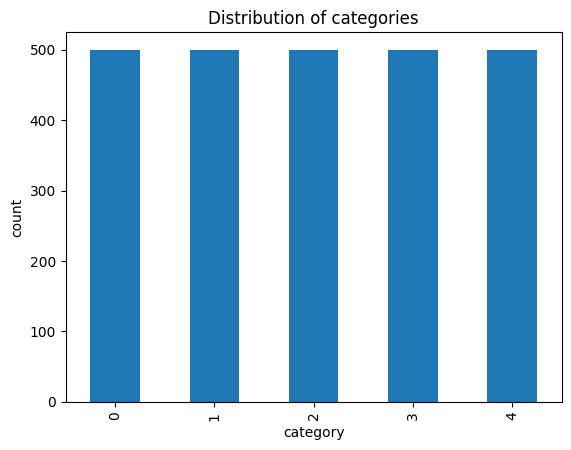

In [88]:
classes_df['class_type'].value_counts().plot(kind='bar')
plt.xlabel("category")
plt.ylabel("count")
plt.title("Distribution of categories")

In [89]:
raw_matrix.T.shape

(2500, 9328)

In [90]:
classes_df.dtypes

id             int64
class_type    object
dtype: object

In [91]:
# preprocessing
## transpose the matrix
input_df = raw_matrix.T

## add terms to columns
input_df.columns = raw_terms[0]

## add target by merge
input_df.reset_index(inplace=True)
left_key = 'level_0'
right_key = 'id'
final_df = input_df.merge(classes_df, left_on=left_key, right_on=right_key)
final_df.drop([left_key, 'id_y'], axis=1, inplace=True)

In [92]:
final_df.head()

,aa,aargh,aaron,aaronc,ab,abandon,abc,abid,abil,abl,abomin,abort,abound,abraham,abridg,abroad,absenc,absent,absolut,abstain,abstin,abstract,absurd,abund,abus,ac,academ,academi,academia,acceler,acceller,accept,access,accessdigexcom,accessdigexnet,accessori,accid,accommod,accomod,accompani,accompli,accomplish,accord,account,accumul,accur,accuraci,accus,acdalca,achiev,...,zbhj,zbj,zc,zchz,zchzv,zd,ze,zealand,zelepukin,zenith,zeo,zero,zeta,zeustamuedu,zezel,zg,zh,zhamnov,zhao,zhitnik,zi,zikzakapanaorgau,zimmerman,zimmermann,zip,zipper,zj,zkm,zkn,zl,zlk,zm,zn,znb,zo,zoeraster,zombo,zone,zoom,zq,zr,zrb,zs,zu,zubov,zv,zw,zx,zz,class_type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [93]:
# X, y split
X = final_df.drop("class_type", axis=1)
y = final_df['class_type']

In [94]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE)

In [95]:
# TFxIDF transformation
def tfIdfTrnasformation(term_doc_matrix):
  N = len(term_doc_matrix)

  # Calculate the inverse document frequency (IDF)
  idf = {}
  for term in term_doc_matrix.columns:
    df = len(term_doc_matrix[term_doc_matrix[term] > 0])
    idf[term] = np.log(N / (df + 1))

  # Calculate the TF-IDF values
  for term in term_doc_matrix.columns:
    term_doc_matrix[term] = term_doc_matrix[term] * idf[term]
  return term_doc_matrix

In [96]:
tf_idf = tfIdfTransformation()

In [97]:
# transform into tfidf dataframe
train_tfidf_matrix = pd.DataFrame(tf_idf.fit_transform(X_train).toarray(), columns = raw_terms[0].to_list())
test_tfidf_matrix = pd.DataFrame(tf_idf.fit_transform(X_test).toarray(), columns = raw_terms[0].to_list())

In [98]:
train_tfidf_matrix.head()

,aa,aargh,aaron,aaronc,ab,abandon,abc,abid,abil,abl,abomin,abort,abound,abraham,abridg,abroad,absenc,absent,absolut,abstain,abstin,abstract,absurd,abund,abus,ac,academ,academi,academia,acceler,acceller,accept,access,accessdigexcom,accessdigexnet,accessori,accid,accommod,accomod,accompani,accompli,accomplish,accord,account,accumul,accur,accuraci,accus,acdalca,achiev,...,zb,zbhj,zbj,zc,zchz,zchzv,zd,ze,zealand,zelepukin,zenith,zeo,zero,zeta,zeustamuedu,zezel,zg,zh,zhamnov,zhao,zhitnik,zi,zikzakapanaorgau,zimmerman,zimmermann,zip,zipper,zj,zkm,zkn,zl,zlk,zm,zn,znb,zo,zoeraster,zombo,zone,zoom,zq,zr,zrb,zs,zu,zubov,zv,zw,zx,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## c.
Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster (mean TFxIDF frequency of the term). Your output should also display the cluster DF value for the top N terms. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the nunber of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean TFxIDF weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).

In [99]:
from sklearn.cluster import KMeans

In [100]:
# constants
num_cluster = 3
tfidf_matrix = train_tfidf_matrix
terms = raw_terms[0].to_list()

In [116]:
top_n = 10
results_df = pd.DataFrame()
for i in range(4, 9, 1):
  # results empty list
  results_per_cluster = []
  kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE)
  clus_labels = kmeans.fit_predict(tfidf_matrix)
  # Get cluster centroids
  cluster_centers = kmeans.cluster_centers_
  X_train['cluster_label'] = clus_labels

  cluster_assignments = kmeans.labels_
  # Group data by cluster label
  grouped = X_train.groupby('cluster_label')

  # loop through each cluster
  for cluster_label, group in grouped:
      # term count
      term_counts = group.drop('cluster_label', axis=1).sum()

      # Sort
      sorted_terms = term_counts.sort_values(ascending=False)

      # Get the top N terms
      top_terms = sorted_terms.head(top_n)

      # Calculate the DF value
      df_values = []
      for term in top_terms.index:
          term_df = (group[term] > 0).mean()
          df_values.append(term_df)

      # Calculate the percentage of words in documents for each term
      percent_in_docs = [term_counts[term] / group.shape[0] for term in top_terms.index]

      # Store the results
      results_per_cluster.append({
          'run_cluster':i,
          'cluster': cluster_label,
          'top_terms': top_terms.index.tolist(),
          'counts': top_terms.tolist(),
          'df_value': df_values,
          'per_in_docs': percent_in_docs
      })
      tmp_results_df = pd.DataFrame(results_per_cluster).explode(['top_terms', 'counts', 'df_value', 'per_in_docs'])
      results_df = pd.concat([results_df, tmp_results_df], axis=0)

In [118]:
results_df.run_cluster.value_counts()

8    360
7    280
6    210
5    150
4    100
Name: run_cluster, dtype: int64

In [190]:
# drop duplicated
results_df.drop_duplicates(['run_cluster', 'cluster', 'top_terms'], keep='first', inplace=True)

In [193]:
# get results of best cluster
final_cluster_results = results_df[results_df.run_cluster==4]

In [194]:
final_cluster_results

,run_cluster,cluster,top_terms,counts,df_value,per_in_docs
0,4,0,god,1005,0.655589,3.036254
0,4,0,christian,585,0.522659,1.767372
0,4,0,on,522,0.598187,1.577039
0,4,0,peopl,432,0.504532,1.305136
0,4,0,subject,388,1.0,1.172205
0,4,0,sin,337,0.253776,1.018127
0,4,0,jesu,323,0.326284,0.975831
0,4,0,church,320,0.271903,0.966767
0,4,0,believ,317,0.456193,0.957704
0,4,0,know,309,0.44713,0.933535


KMeans with 4 cluster makes most sense in terms of capturing some of the key topics in the documents.

### Extra credit

use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster (using your best clustering from earlier experiments.]

In [126]:
!pip install wordcloud

In [133]:
from wordcloud import WordCloud

In [134]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)

In [135]:
# fit on tfidf data
labels = kmeans.fit_predict(train_tfidf_matrix)

In [136]:
# assign label to count vectorized data
X_train['cluster_label'] = labels

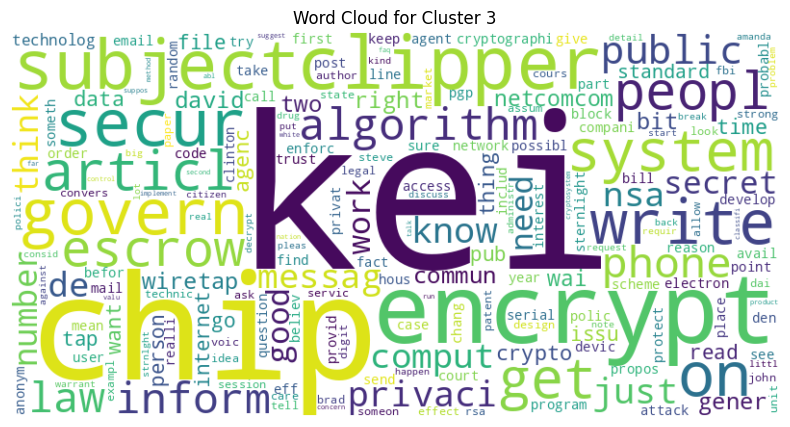

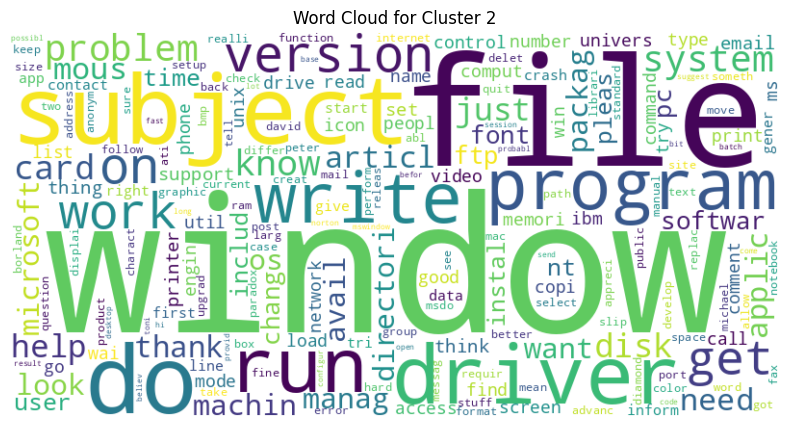

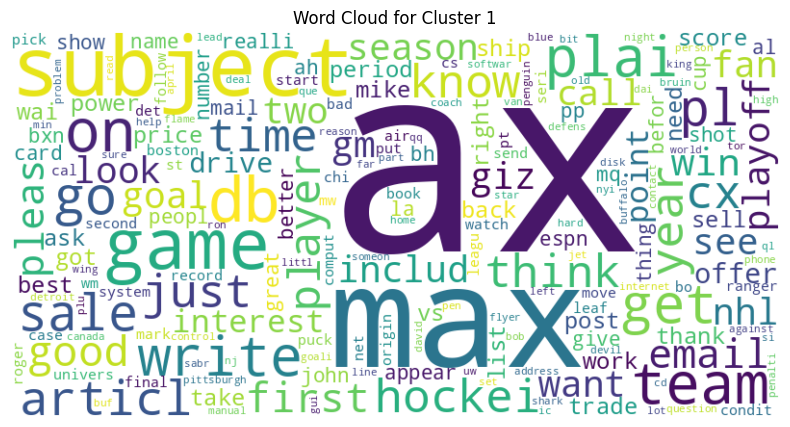

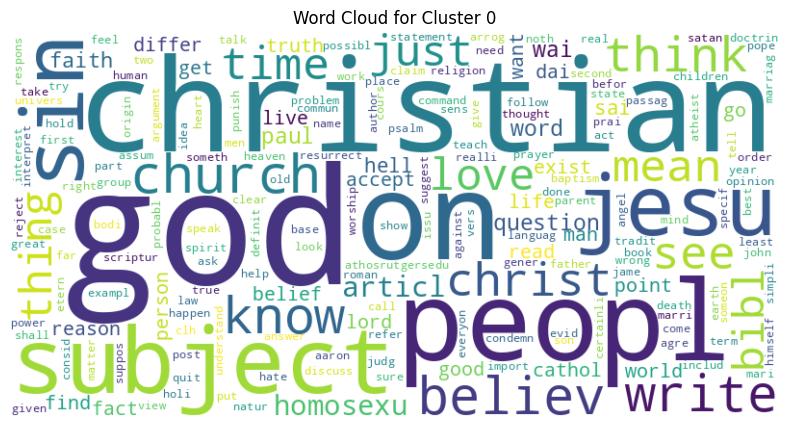

In [138]:
for cluster in X_train.cluster_label.unique():
  cluster_data = X_train[X_train['cluster_label'] == cluster]

  # Combine terms and their counts
  terms_and_counts = {}
  for term in cluster_data.columns:
    if term != 'cluster_label':
      terms_and_counts[term] = cluster_data[term].sum()
    # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white')
  wordcloud.generate_from_frequencies(terms_and_counts)

  # Display the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for Cluster {cluster}')
  plt.show()

## d.
Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part.

In [140]:
classes_df.class_type.value_counts()

0    500
1    500
2    500
3    500
4    500
Name: class_type, dtype: int64

In [142]:
X_train['original_cluster'] = y_train

In [143]:
from sklearn.metrics import completeness_score, homogeneity_score

In [144]:
# Calculate Completeness and Homogeneity values
completeness = completeness_score(X_train.original_cluster, X_train.cluster_label)
homogeneity = homogeneity_score(X_train.original_cluster, X_train.cluster_label)

In [145]:
print("Completeness: ", completeness)
print("Homogeneity: ", homogeneity)

Completeness:  0.73344474808417
Homogeneity:  0.5704800247850171


### Extra credit
Try several other clustering runs each time with values of k ranging between 4 and 8 and in each case compute Completeness and Homogeneity. This experiment will indicate which clustering provides the best representation of the original newsgroup categories. Provide a brief report of your experiment including a comparison of final results for at least three different runs.]

In [146]:
# loop over range of cluster numbers
homogeneity_scrs = []
completeness_scrs = []
for num_cluster in range(4, 9, 1):
  kmeans = KMeans(n_clusters=num_cluster, random_state=RANDOM_STATE)
  # fit on tfidf data
  labels = kmeans.fit_predict(train_tfidf_matrix)
  # assign label to count vectorized data
  X_train['cluster_label'] = labels
  completeness_scrs.append(completeness_score(X_train.original_cluster, X_train.cluster_label))
  homogeneity_scrs.append(homogeneity_score(X_train.original_cluster, X_train.cluster_label))

In [152]:
print(completeness_scrs)
print(homogeneity_scrs)

[0.73344474808417, 0.6949890297468749, 0.665635663903568, 0.6163265356819025, 0.6144631044278965]
[0.5704800247850171, 0.650654025431595, 0.7326576002237095, 0.7033004648107353, 0.7505430229599703]


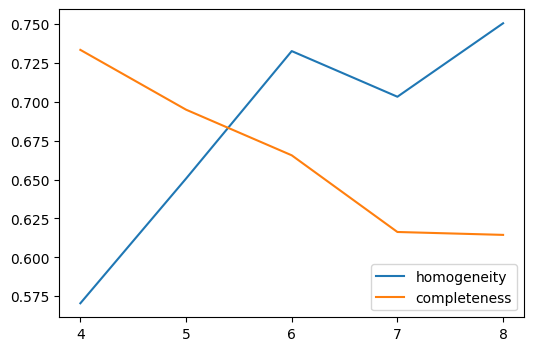

In [150]:
# plot results
x_ticks = [i for i in range(4, 9, 1)]
x_labels = [str(i) for i in range(4, 9, 1)]
plt.figure(figsize=(6, 4))
plt.plot(range(4, 9, 1), homogeneity_scrs, label='homogeneity')
plt.plot(range(4, 9, 1), completeness_scrs, label = 'completeness')
plt.xticks(x_ticks, x_labels)
plt.legend()

As we increase the number of clusters (k), you achieve higher homogeneity but lower completeness. This suggests a trade-off between internal cluster consistency and ensuring that all data points from the same class are correctly assigned to the same cluster. The choice of the best value for k should consider this trade-off and aim to find a balance between these two metrics based on your specific clustering goals and the characteristics of your data.

From the chart above, it shows that 8 clusters gives the most homogenous clusters.

## e.
Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.

In [195]:
# model initiate
kmeans = KMeans(n_clusters=8, random_state=RANDOM_STATE)

In [196]:
# fit kmeans model
kmeans.fit(train_tfidf_matrix)

KMeans(random_state=99)

In [197]:
# get centroids
cluster_centroids = kmeans.cluster_centers_

In [198]:
# total centroids
len(cluster_centroids)

8

In [199]:
# list to store results
assigned_clusters = []

In [200]:
# loop over test set to calculate cosine_similarity user defined function
for i, test_doc in test_tfidf_matrix.iterrows():
  test_array = np.array(test_doc)
  similarities = [cosine_similarity_distance(test_array, i) for i in cluster_centroids]
  assigned_clusters.append([np.argmax(similarities), np.max(similarities)])

In [201]:
len(assigned_clusters)

500

In [205]:
# final results
np.array(assigned_clusters)[np.random.choice(len(assigned_clusters), 8, replace=False)]

array([[6.        , 0.9799959 ],
       [3.        , 0.96318653],
       [6.        , 0.97636151],
       [1.        , 0.95219695],
       [6.        , 0.96733353],
       [2.        , 0.92531777],
       [5.        , 0.97761006],
       [3.        , 0.97428672]])